In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from src.wrapped import Wrapped
from src.analysesV02 import Analytics
from src.trainV02 import TrainModels

# Avaliando Resultados Preliminares

In [2]:
ac = Analytics()
tm = TrainModels()
wp = Wrapped(
    '../data/row/',
    '../data/processed/',
    '../data/files/'
)

## Importando resultados Preliminares

In [3]:
# percusão
xgb_percusao    = wp.load_data('resultados_parametros_percusao_XGBoost')
histgb_percusao = wp.load_data('resultados_parametros_percusao_histGB')
rf_percusao     = wp.load_data('resultados_parametros_percusao_random_forest')

# aerofone
histgb_aerofone = wp.load_data('resultados_parametros_aerofone_histGB')
xgb_aerofone    = wp.load_data('resultados_parametros_aerofone_XGBoost')
rf_aerofone     = wp.load_data('resultados_parametros_aerofone_random_forest')

# corda
histgb_corda = wp.load_data('resultados_parametros_corda_histGB')
xgb_corda    = wp.load_data('resultados_parametros_corda_XGBoost')
rf_corda     = wp.load_data('resultados_parametros_corda_random_forest')

# sopro
xgb_sopro    = wp.load_data('resultados_parametros_sopro_XGBoost')
histgb_sopro = wp.load_data('resultados_parametros_sopro_histGB')
rf_sopro     = wp.load_data('resultados_parametros_sopro_random_forest')

- crinado algumas colunas de indentificação

In [4]:
rf_sopro["base"] = 'sopro'
rf_sopro["model"] = 'Random Forest'
xgb_sopro["base"] = 'sopro'
xgb_sopro["model"] = 'XGBoost'
histgb_sopro["base"] = 'sopro'
histgb_sopro["model"] = 'HistGradientBoost'

rf_corda["base"] = 'corda'
rf_corda["model"] = 'Random Forest'
xgb_corda["base"] = 'corda'
xgb_corda["model"] = 'XGBoost'
histgb_corda["base"] = 'corda'
histgb_corda["model"] = 'HistGradientBoost'

In [5]:
rf_percusao["base"] = 'percusao'
rf_percusao["model"] = 'Random Forest'
xgb_percusao["base"] = 'percusao'
xgb_percusao["model"] = 'XGBoost'
histgb_percusao["base"] = 'percusao'
histgb_percusao["model"] = 'HistGradientBoost'

rf_aerofone["base"] = 'aerofone'
rf_aerofone["model"] = 'Random Forest'
xgb_aerofone["base"] = 'aerofone'
xgb_aerofone["model"] = 'XGBoost'
histgb_aerofone["base"] = 'aerofone'
histgb_aerofone["model"] = 'HistGradientBoost'

## Percusão

In [6]:
rf_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
52,manhattan,ball_tree,11,"{'bootstrap': True, 'criterion': 'entropy', 'm...",78.165323,percusao,Random Forest
58,manhattan,brute,11,"{'bootstrap': False, 'criterion': 'entropy', '...",78.165323,percusao,Random Forest
49,manhattan,auto,11,"{'bootstrap': True, 'criterion': 'entropy', 'm...",77.520161,percusao,Random Forest
55,manhattan,kd_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",77.520161,percusao,Random Forest
7,manhattan,kd_tree,3,"{'bootstrap': True, 'criterion': 'gini', 'max_...",76.915323,percusao,Random Forest
28,manhattan,ball_tree,7,"{'bootstrap': True, 'criterion': 'entropy', 'm...",76.854839,percusao,Random Forest
10,manhattan,brute,3,"{'bootstrap': True, 'criterion': 'entropy', 'm...",76.250000,percusao,Random Forest
31,manhattan,kd_tree,7,"{'bootstrap': True, 'criterion': 'entropy', 'm...",76.209677,percusao,Random Forest
4,manhattan,ball_tree,3,"{'bootstrap': True, 'criterion': 'gini', 'max_...",75.645161,percusao,Random Forest
1,manhattan,auto,3,"{'bootstrap': True, 'criterion': 'entropy', 'm...",75.625000,percusao,Random Forest


- HistGradiente Boost

In [7]:
histgb_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
10,manhattan,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",77.600806,percusao,HistGradientBoost
7,manhattan,kd_tree,3,"{'loss': 'log_loss', 'max_bins': 164, 'max_dep...",77.560484,percusao,HistGradientBoost
1,manhattan,auto,3,"{'loss': 'auto', 'max_bins': 250, 'max_depth':...",76.270161,percusao,HistGradientBoost
4,manhattan,ball_tree,3,"{'loss': 'auto', 'max_bins': 175, 'max_depth':...",76.270161,percusao,HistGradientBoost
49,manhattan,auto,11,"{'loss': 'categorical_crossentropy', 'max_bins...",76.229839,percusao,HistGradientBoost
52,manhattan,ball_tree,11,"{'loss': 'log_loss', 'max_bins': 249, 'max_dep...",75.604839,percusao,HistGradientBoost
55,manhattan,kd_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.979839,percusao,HistGradientBoost
58,manhattan,brute,11,"{'loss': 'log_loss', 'max_bins': 142, 'max_dep...",74.979839,percusao,HistGradientBoost
34,manhattan,brute,7,"{'loss': 'auto', 'max_bins': 247, 'max_depth':...",74.334677,percusao,HistGradientBoost
0,euclidean,auto,3,"{'loss': 'log_loss', 'max_bins': 102, 'max_dep...",73.064516,percusao,HistGradientBoost


- XGBoost

In [8]:
xgb_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
58,manhattan,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.28...",78.830645,percusao,XGBoost
52,manhattan,ball_tree,11,"{'eta': 0.1940450475269715, 'gamma': 0, 'learn...",78.165323,percusao,XGBoost
55,manhattan,kd_tree,11,"{'eta': 0.17335374054899244, 'gamma': 0, 'lear...",76.935484,percusao,XGBoost
49,manhattan,auto,11,"{'eta': 0.04244016992180402, 'gamma': 2, 'lear...",76.915323,percusao,XGBoost
25,manhattan,auto,7,"{'eta': 0.02412036066044697, 'gamma': 0, 'lear...",76.330645,percusao,XGBoost
4,manhattan,ball_tree,3,"{'eta': 0.10400084745987664, 'gamma': 0, 'lear...",76.270161,percusao,XGBoost
40,manhattan,ball_tree,9,"{'eta': 0.17517144191986134, 'gamma': 0, 'lear...",75.584677,percusao,XGBoost
53,minkowski,ball_tree,11,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.6...",75.000000,percusao,XGBoost
1,manhattan,auto,3,"{'eta': 0.022197128516294087, 'gamma': 0, 'lea...",74.979839,percusao,XGBoost
3,euclidean,ball_tree,3,"{'eta': 0.11703994973177669, 'gamma': 1, 'lear...",74.979839,percusao,XGBoost


In [9]:
results_percusao = pd.concat([histgb_percusao, xgb_percusao, rf_percusao])
results_percusao.nlargest(2, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
58,manhattan,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.28...",78.830645,percusao,XGBoost
52,manhattan,ball_tree,11,"{'eta': 0.1940450475269715, 'gamma': 0, 'learn...",78.165323,percusao,XGBoost


## Aerofone 

In [10]:
rf_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
56,minkowski,kd_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",74.857143,aerofone,Random Forest
59,minkowski,brute,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",74.285714,aerofone,Random Forest
53,minkowski,ball_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.142857,aerofone,Random Forest
43,manhattan,kd_tree,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.000000,aerofone,Random Forest
50,minkowski,auto,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.000000,aerofone,Random Forest
54,euclidean,kd_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.000000,aerofone,Random Forest
46,manhattan,brute,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.428571,aerofone,Random Forest
48,euclidean,auto,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.428571,aerofone,Random Forest
28,manhattan,ball_tree,7,"{'bootstrap': True, 'criterion': 'entropy', 'm...",71.428571,aerofone,Random Forest
37,manhattan,auto,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",70.857143,aerofone,Random Forest


In [11]:
histgb_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
56,minkowski,kd_tree,11,"{'loss': 'log_loss', 'max_bins': 105, 'max_dep...",76.000000,aerofone,HistGradientBoost
50,minkowski,auto,11,"{'loss': 'auto', 'max_bins': 132, 'max_depth':...",74.857143,aerofone,HistGradientBoost
51,euclidean,ball_tree,11,"{'loss': 'auto', 'max_bins': 100, 'max_depth':...",74.857143,aerofone,HistGradientBoost
53,minkowski,ball_tree,11,"{'loss': 'log_loss', 'max_bins': 250, 'max_dep...",74.857143,aerofone,HistGradientBoost
54,euclidean,kd_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.857143,aerofone,HistGradientBoost
57,euclidean,brute,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.857143,aerofone,HistGradientBoost
48,euclidean,auto,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.285714,aerofone,HistGradientBoost
59,minkowski,brute,11,"{'loss': 'auto', 'max_bins': 100, 'max_depth':...",74.285714,aerofone,HistGradientBoost
27,euclidean,ball_tree,7,"{'loss': 'categorical_crossentropy', 'max_bins...",72.974790,aerofone,HistGradientBoost
52,manhattan,ball_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",72.571429,aerofone,HistGradientBoost


In [12]:
xgb_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
25,manhattan,auto,7,"{'eta': 0.13078759638176302, 'gamma': 3, 'lear...",74.285714,aerofone,XGBoost
43,manhattan,kd_tree,9,"{'eta': 0.2, 'gamma': 2, 'learning_rate': 0.27...",74.285714,aerofone,XGBoost
58,manhattan,brute,11,"{'eta': 0.16784859262857896, 'gamma': 3, 'lear...",74.285714,aerofone,XGBoost
51,euclidean,ball_tree,11,"{'eta': 0.10539676565614277, 'gamma': 1, 'lear...",73.714286,aerofone,XGBoost
53,minkowski,ball_tree,11,"{'eta': 0.13155748726410285, 'gamma': 0, 'lear...",73.714286,aerofone,XGBoost
59,minkowski,brute,11,"{'eta': 0.05802260849200566, 'gamma': 0, 'lear...",73.714286,aerofone,XGBoost
2,minkowski,auto,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.39...",73.714286,aerofone,XGBoost
16,manhattan,ball_tree,5,"{'eta': 0.011598509185093163, 'gamma': 4, 'lea...",72.571429,aerofone,XGBoost
19,manhattan,kd_tree,5,"{'eta': 0.1156178322320468, 'gamma': 2, 'learn...",72.571429,aerofone,XGBoost
28,manhattan,ball_tree,7,"{'eta': 0.060018951645943265, 'gamma': 4, 'lea...",72.571429,aerofone,XGBoost


- Dois melhores Resultados Gerais

In [13]:
results_aerofone = pd.concat([histgb_aerofone, xgb_aerofone, rf_aerofone])
results_aerofone.nlargest(2, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
56,minkowski,kd_tree,11,"{'loss': 'log_loss', 'max_bins': 105, 'max_dep...",76.000000,aerofone,HistGradientBoost
50,minkowski,auto,11,"{'loss': 'auto', 'max_bins': 132, 'max_depth':...",74.857143,aerofone,HistGradientBoost


## Corda

In [14]:
histgb_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
26,minkowski,auto,7,"{'loss': 'log_loss', 'max_bins': 100, 'max_dep...",52.915825,corda,HistGradientBoost
0,euclidean,auto,3,"{'loss': 'categorical_crossentropy', 'max_bins...",52.909091,corda,HistGradientBoost
2,minkowski,auto,3,"{'loss': 'auto', 'max_bins': 103, 'max_depth':...",52.909091,corda,HistGradientBoost
24,euclidean,auto,7,"{'loss': 'categorical_crossentropy', 'max_bins...",52.195286,corda,HistGradientBoost
35,minkowski,brute,7,"{'loss': 'categorical_crossentropy', 'max_bins...",52.195286,corda,HistGradientBoost
27,euclidean,ball_tree,7,"{'loss': 'auto', 'max_bins': 116, 'max_depth':...",52.181818,corda,HistGradientBoost
33,euclidean,brute,7,"{'loss': 'categorical_crossentropy', 'max_bins...",51.824916,corda,HistGradientBoost
29,minkowski,ball_tree,7,"{'loss': 'auto', 'max_bins': 237, 'max_depth':...",51.818182,corda,HistGradientBoost
32,minkowski,kd_tree,7,"{'loss': 'categorical_crossentropy', 'max_bins...",51.811448,corda,HistGradientBoost
9,euclidean,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",51.811448,corda,HistGradientBoost


In [15]:
xgb_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
13,manhattan,auto,5,"{'eta': 0.027861238825289514, 'gamma': 1, 'lea...",54.740741,corda,XGBoost
32,minkowski,kd_tree,7,"{'eta': 0.01, 'gamma': 1, 'learning_rate': 0.0...",53.993266,corda,XGBoost
22,manhattan,brute,5,"{'eta': 0.17656528033050015, 'gamma': 4, 'lear...",53.649832,corda,XGBoost
47,minkowski,brute,9,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.18...",53.643098,corda,XGBoost
19,manhattan,kd_tree,5,"{'eta': 0.10124979781367956, 'gamma': 7, 'lear...",53.636364,corda,XGBoost
7,manhattan,kd_tree,3,"{'eta': 0.18310315230961735, 'gamma': 0, 'lear...",53.629630,corda,XGBoost
36,euclidean,auto,9,"{'eta': 0.15103108133583606, 'gamma': 2, 'lear...",53.272727,corda,XGBoost
3,euclidean,ball_tree,3,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.1...",53.259259,corda,XGBoost
26,minkowski,auto,7,"{'eta': 0.10326872885653474, 'gamma': 2, 'lear...",52.922559,corda,XGBoost
33,euclidean,brute,7,"{'eta': 0.05916415692571623, 'gamma': 4, 'lear...",52.922559,corda,XGBoost


In [16]:
rf_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
38,minkowski,auto,9,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.740741,corda,Random Forest
42,euclidean,kd_tree,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",54.383838,corda,Random Forest
24,euclidean,auto,7,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.370370,corda,Random Forest
51,euclidean,ball_tree,11,"{'bootstrap': False, 'criterion': 'entropy', '...",54.020202,corda,Random Forest
54,euclidean,kd_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",54.013468,corda,Random Forest
29,minkowski,ball_tree,7,"{'bootstrap': True, 'criterion': 'entropy', 'm...",54.006734,corda,Random Forest
53,minkowski,ball_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",54.006734,corda,Random Forest
22,manhattan,brute,5,"{'bootstrap': True, 'criterion': 'gini', 'max_...",53.656566,corda,Random Forest
48,euclidean,auto,11,"{'bootstrap': False, 'criterion': 'entropy', '...",53.649832,corda,Random Forest
44,minkowski,kd_tree,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.643098,corda,Random Forest


- Dois melhores Resultados Gerais

In [17]:
results_corda = pd.concat([histgb_corda, xgb_corda, rf_corda])
results_corda.nlargest(2, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
38,minkowski,auto,9,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.740741,corda,Random Forest
13,manhattan,auto,5,"{'eta': 0.027861238825289514, 'gamma': 1, 'lea...",54.740741,corda,XGBoost


## Sopro

- Random Forest

In [18]:
rf_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
34,manhattan,brute,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",75.795455,sopro,Random Forest
25,manhattan,auto,7,"{'bootstrap': False, 'criterion': 'entropy', '...",74.564394,sopro,Random Forest
31,manhattan,kd_tree,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",74.564394,sopro,Random Forest
28,manhattan,ball_tree,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.939394,sopro,Random Forest
4,manhattan,ball_tree,3,"{'bootstrap': False, 'criterion': 'entropy', '...",73.920455,sopro,Random Forest
1,manhattan,auto,3,"{'bootstrap': False, 'criterion': 'entropy', '...",73.314394,sopro,Random Forest
10,manhattan,brute,3,"{'bootstrap': False, 'criterion': 'entropy', '...",73.314394,sopro,Random Forest
22,manhattan,brute,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.295455,sopro,Random Forest
16,manhattan,ball_tree,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.276515,sopro,Random Forest
19,manhattan,kd_tree,5,"{'bootstrap': False, 'criterion': 'entropy', '...",73.276515,sopro,Random Forest


- XGBoost

In [19]:
xgb_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
19,manhattan,kd_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.03...",73.276515,sopro,XGBoost
42,euclidean,kd_tree,9,"{'eta': 0.05287925010388384, 'gamma': 2, 'lear...",72.632576,sopro,XGBoost
16,manhattan,ball_tree,5,"{'eta': 0.13425722671358642, 'gamma': 4, 'lear...",72.064394,sopro,XGBoost
29,minkowski,ball_tree,7,"{'eta': 0.19292741191509635, 'gamma': 3, 'lear...",72.064394,sopro,XGBoost
6,euclidean,kd_tree,3,"{'eta': 0.01, 'gamma': 1, 'learning_rate': 0.5...",71.458333,sopro,XGBoost
28,manhattan,ball_tree,7,"{'eta': 0.11869555680879938, 'gamma': 4, 'lear...",71.458333,sopro,XGBoost
31,manhattan,kd_tree,7,"{'eta': 0.2, 'gamma': 2, 'learning_rate': 0.04...",71.458333,sopro,XGBoost
47,minkowski,brute,9,"{'eta': 0.12979288809955303, 'gamma': 5, 'lear...",71.458333,sopro,XGBoost
2,minkowski,auto,3,"{'eta': 0.04997346628476116, 'gamma': 1, 'lear...",71.439394,sopro,XGBoost
7,manhattan,kd_tree,3,"{'eta': 0.18757752962521396, 'gamma': 1, 'lear...",71.439394,sopro,XGBoost


- HistGradrientBoost

In [20]:
histgb_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
1,manhattan,auto,3,"{'loss': 'log_loss', 'max_bins': 121, 'max_dep...",72.083333,sopro,HistGradientBoost
28,manhattan,ball_tree,7,"{'loss': 'log_loss', 'max_bins': 113, 'max_dep...",72.064394,sopro,HistGradientBoost
31,manhattan,kd_tree,7,"{'loss': 'categorical_crossentropy', 'max_bins...",72.064394,sopro,HistGradientBoost
50,minkowski,auto,11,"{'loss': 'categorical_crossentropy', 'max_bins...",72.064394,sopro,HistGradientBoost
56,minkowski,kd_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",72.064394,sopro,HistGradientBoost
59,minkowski,brute,11,"{'loss': 'auto', 'max_bins': 100, 'max_depth':...",72.064394,sopro,HistGradientBoost
25,manhattan,auto,7,"{'loss': 'auto', 'max_bins': 244, 'max_depth':...",72.045455,sopro,HistGradientBoost
34,manhattan,brute,7,"{'loss': 'log_loss', 'max_bins': 222, 'max_dep...",72.045455,sopro,HistGradientBoost
48,euclidean,auto,11,"{'loss': 'log_loss', 'max_bins': 103, 'max_dep...",72.045455,sopro,HistGradientBoost
7,manhattan,kd_tree,3,"{'loss': 'auto', 'max_bins': 100, 'max_depth':...",71.458333,sopro,HistGradientBoost


- Dois melhores Resultados Gerais

In [21]:
results_sopro = pd.concat([histgb_sopro, xgb_sopro, rf_sopro])
results_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
34,manhattan,brute,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",75.795455,sopro,Random Forest
25,manhattan,auto,7,"{'bootstrap': False, 'criterion': 'entropy', '...",74.564394,sopro,Random Forest
31,manhattan,kd_tree,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",74.564394,sopro,Random Forest
28,manhattan,ball_tree,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.939394,sopro,Random Forest
4,manhattan,ball_tree,3,"{'bootstrap': False, 'criterion': 'entropy', '...",73.920455,sopro,Random Forest
1,manhattan,auto,3,"{'bootstrap': False, 'criterion': 'entropy', '...",73.314394,sopro,Random Forest
10,manhattan,brute,3,"{'bootstrap': False, 'criterion': 'entropy', '...",73.314394,sopro,Random Forest
22,manhattan,brute,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.295455,sopro,Random Forest
19,manhattan,kd_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.03...",73.276515,sopro,XGBoost
16,manhattan,ball_tree,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.276515,sopro,Random Forest


# Avaliando os dois melhores Resultados Preliminares de cada Base

- Concatenando os resultados

In [22]:
results_geral = pd.concat([
    results_aerofone.nlargest(2, "accuracy_models"),
    results_corda.nlargest(2, "accuracy_models"),
    results_percusao.nlargest(2, "accuracy_models"),
    results_sopro.nlargest(2, "accuracy_models")
]).reset_index().drop(columns=["index"])

results_geral["name_model_test"] = ["Model-01", "Model-02", "Model-01", "Model-02" , "Model-01", "Model-02", "Model-01", "Model-02"]

results_geral

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
0,minkowski,kd_tree,11,"{'loss': 'log_loss', 'max_bins': 105, 'max_dep...",76.000000,aerofone,HistGradientBoost,Model-01
1,minkowski,auto,11,"{'loss': 'auto', 'max_bins': 132, 'max_depth':...",74.857143,aerofone,HistGradientBoost,Model-02
2,minkowski,auto,9,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.740741,corda,Random Forest,Model-01
3,manhattan,auto,5,"{'eta': 0.027861238825289514, 'gamma': 1, 'lea...",54.740741,corda,XGBoost,Model-02
4,manhattan,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.28...",78.830645,percusao,XGBoost,Model-01
5,manhattan,ball_tree,11,"{'eta': 0.1940450475269715, 'gamma': 0, 'learn...",78.165323,percusao,XGBoost,Model-02
6,manhattan,brute,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",75.795455,sopro,Random Forest,Model-01
7,manhattan,auto,7,"{'bootstrap': False, 'criterion': 'entropy', '...",74.564394,sopro,Random Forest,Model-02


- Importando base de instrumentos para avaliação de modelos

In [23]:
# dataframe
df = wp.load_data('df_instrumentos_features_selecionadas').drop(columns=['file_name'])

# dataframes por instrumentos
inst_corda = ["cello", "guitar", "violin", "bass", "banjo", "mandolin", "ukulele"]
inst_percusao = ["mallet_percussion", "drums", "cymbals"]
inst_sopro = ["clarinet", "trombone", "flute", "trumpet", "saxophone"]
inst_aerofone = ["accordion", "organ", "piano"] 

df_inst_aerofone = df[df['instrumento'].isin(inst_aerofone)]
df_inst_sopro = df[df['instrumento'].isin(inst_sopro)]
df_inst_corda = df[df['instrumento'].isin(inst_corda)]
df_inst_percusao = df[df['instrumento'].isin(inst_percusao)]

# cria labels instrumentos
le = LabelEncoder()

df_inst_aerofone['labels'] = le.fit_transform(df_inst_aerofone.instrumento)
df_inst_sopro['labels'] = le.fit_transform(df_inst_sopro.instrumento)
df_inst_corda['labels'] = le.fit_transform(df_inst_corda.instrumento)
df_inst_percusao['labels'] = le.fit_transform(df_inst_percusao.instrumento)

/tmp/ipykernel_11300/3385371229.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inst_aerofone['labels'] = le.fit_transform(df_inst_aerofone.instrumento)
/tmp/ipykernel_11300/3385371229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inst_sopro['labels'] = le.fit_transform(df_inst_sopro.instrumento)
/tmp/ipykernel_11300/3385371229.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

## Aerofone 

### Model 1

- Detected outilers

In [24]:
outlier_model_1_aerofone = ac.detected_outilers_knn(metric="minkowski", algorithm="kd_tree", neighbors=11, dataframe=df_inst_aerofone)

/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/pyod/models/knn.py:158: FutureWarning: algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.
  warn('algorithm parameter is deprecated and will be removed '


- Removed outilers

In [25]:
df_inst_aerofone_01 = ac.show_outilers(dataframe=df_inst_aerofone, pred=outlier_model_1_aerofone["predictions"])
df_inst_aerofone_01.head()

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
0,0.010380,0.038218,0.513887,0.581963,0.434641,0.293949,0.317826,0.271148,0.548258,-24.170067,...,3409.640722,2600.055158,1.098243,5260.821321,-44.640682,-30.202150,0.149672,33095,accordion,0
3,0.157274,-0.066099,0.209729,0.338755,0.660264,0.256625,0.275209,0.180417,0.399448,-66.319801,...,3855.791675,2903.979876,1.218963,6751.133809,-42.723160,-44.649315,0.144010,31836,accordion,0
11,0.067479,-0.072520,0.319265,0.259853,0.236549,0.416537,0.552991,0.282335,0.311797,-94.087822,...,3774.787224,2669.619821,1.465200,6189.322048,-46.716263,-67.817337,0.096043,21237,accordion,0
28,0.177880,0.099179,0.446227,0.186154,0.310970,0.289374,0.480033,0.271526,0.262448,-113.129501,...,3006.696138,3178.625677,1.504104,5658.636007,-64.840324,-79.991013,0.225914,49936,accordion,0
46,0.001389,0.058207,0.307783,0.359920,0.321503,0.340189,0.230577,0.230887,0.267941,-335.472443,...,3364.332940,3317.306522,1.480623,6072.413242,-37.332355,-79.453758,0.249911,55267,accordion,0


- Train model

In [26]:
model = HistGradientBoostingClassifier(
    loss= 'log_loss',
    max_bins=105,
    max_depth=19,
    min_samples_leaf=5,
    random_state=42
)

X = df_inst_aerofone_01.drop(columns=["instrumento", "labels"])
y = df_inst_aerofone_01["labels"]

results_aerofone_1 = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_aerofone_1

Size data inputs 175
Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5,
                               random_state=42) do Fold 0: 0.6857142857142857
Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5,
                               random_state=42) do Fold 1: 0.7714285714285715
Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5,
                               random_state=42) do Fold 2: 0.8
Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5,
                               random_state=42) do Fold 3: 0.8
Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5,
                               random_state=42) do Fold 4: 0.7428571428571429


{'accuracy': 76.0,
 'std': 0.04276179870598792,
 'predictions': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 2., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
        2., 1., 1., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        1., 2., 2., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 2., 0., 1.]),
 'y_validate': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

- Matriz de Confusão

<Axes: title={'center': 'Matriz confusão moodelo 1 aerofone'}>

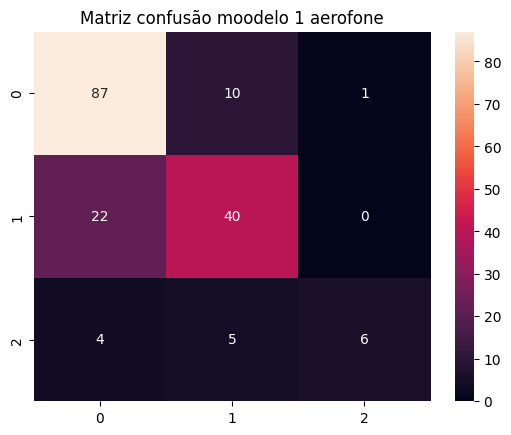

In [27]:
ac.matriz_confusion(results_aerofone_1['y_validate'], results_aerofone_1['predictions'], title='Matriz confusão modelo 1 aerofone')

### Model 2

- Detected outilers

In [28]:
outlier_model_2_aerofone = ac.detected_outilers_knn(metric="minkowski", algorithm="auto", neighbors=11, dataframe=df_inst_aerofone)

- Removed outilers

In [29]:
df_inst_aerofone_02 = ac.show_outilers(dataframe=df_inst_aerofone, pred=outlier_model_2_aerofone["predictions"])
df_inst_aerofone_02.head()

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
0,0.010380,0.038218,0.513887,0.581963,0.434641,0.293949,0.317826,0.271148,0.548258,-24.170067,...,3409.640722,2600.055158,1.098243,5260.821321,-44.640682,-30.202150,0.149672,33095,accordion,0
3,0.157274,-0.066099,0.209729,0.338755,0.660264,0.256625,0.275209,0.180417,0.399448,-66.319801,...,3855.791675,2903.979876,1.218963,6751.133809,-42.723160,-44.649315,0.144010,31836,accordion,0
11,0.067479,-0.072520,0.319265,0.259853,0.236549,0.416537,0.552991,0.282335,0.311797,-94.087822,...,3774.787224,2669.619821,1.465200,6189.322048,-46.716263,-67.817337,0.096043,21237,accordion,0
28,0.177880,0.099179,0.446227,0.186154,0.310970,0.289374,0.480033,0.271526,0.262448,-113.129501,...,3006.696138,3178.625677,1.504104,5658.636007,-64.840324,-79.991013,0.225914,49936,accordion,0
46,0.001389,0.058207,0.307783,0.359920,0.321503,0.340189,0.230577,0.230887,0.267941,-335.472443,...,3364.332940,3317.306522,1.480623,6072.413242,-37.332355,-79.453758,0.249911,55267,accordion,0


- Train model

In [30]:
model = HistGradientBoostingClassifier(
    loss= 'auto',
    max_bins=132,
    max_depth=6,
    min_samples_leaf=5,
    random_state=42
)

X = df_inst_aerofone_02.drop(columns=["instrumento", "labels"])
y = df_inst_aerofone_02["labels"]

results_2_aerofone = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_2_aerofone

Size data inputs 175


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:1998: FutureWarning: The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=132, max_depth=6,
                               min_samples_leaf=5, random_state=42) do Fold 0: 0.6857142857142857


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:1998: FutureWarning: The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=132, max_depth=6,
                               min_samples_leaf=5, random_state=42) do Fold 1: 0.7142857142857143


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:1998: FutureWarning: The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=132, max_depth=6,
                               min_samples_leaf=5, random_state=42) do Fold 2: 0.8


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:1998: FutureWarning: The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=132, max_depth=6,
                               min_samples_leaf=5, random_state=42) do Fold 3: 0.7714285714285715


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:1998: FutureWarning: The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=132, max_depth=6,
                               min_samples_leaf=5, random_state=42) do Fold 4: 0.7714285714285715


{'accuracy': 74.85714285714286,
 'std': 0.041991252733425924,
 'predictions': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 2., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
        2., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 2., 0., 0., 0., 1.,
        1., 2., 2., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 2., 0., 1.]),
 'y_validate': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1.,

- Matrix de confusão

<Axes: title={'center': 'Matriz confusão moodelo 2 aerofone'}>

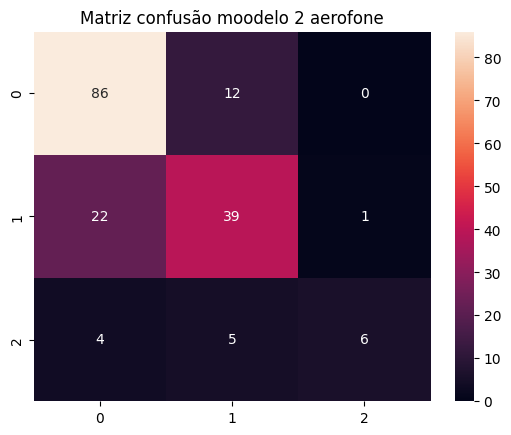

In [31]:
ac.matriz_confusion(results_2_aerofone['y_validate'], results_2_aerofone['predictions'], title='Matriz confusão moodelo 2 aerofone')

# Sopro

### Model 1

- Detected outilers

In [32]:
outlier_model_1_sopro = ac.detected_outilers_knn(metric="manhattan", algorithm="brute", neighbors=7, dataframe=df_inst_sopro)

/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/pyod/models/knn.py:158: FutureWarning: algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.
  warn('algorithm parameter is deprecated and will be removed '


- Removed outilers

In [33]:
df_inst_sopro_01 = ac.show_outilers(dataframe=df_inst_sopro, pred=outlier_model_1_sopro["predictions"])
df_inst_sopro_01.head(3)

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
1876,-0.044667,0.260524,0.692127,0.238955,0.029413,0.424056,0.732275,0.106237,0.264656,-178.568253,...,2269.854161,1872.058375,0.862944,2738.513835,-70.011116,-80.000000,0.139929,30932,clarinet,0
1878,0.089747,0.253008,0.299878,0.225017,0.544357,0.164941,0.079692,0.119684,0.194826,-211.757339,...,2431.808142,1999.856294,1.274141,3282.789275,-58.643265,-71.021973,0.176906,39102,clarinet,0
1886,0.002779,0.015584,0.311722,0.319367,0.339069,0.368589,0.345589,0.443560,0.344975,-85.485229,...,2937.446277,3154.871456,1.945904,5838.245903,-44.260166,-62.325306,0.232276,51374,clarinet,0


- Train model

In [34]:
model = RandomForestClassifier(
    bootstrap = False,
    criterion = "gini",
    max_depth  = 20,
    max_features = "auto",
    min_samples_leaf = 2,
    min_samples_split = 2,
    n_estimators = 202,
    random_state=42
)

X = df_inst_sopro_01.drop(columns=["instrumento", "labels"])
y = df_inst_sopro_01["labels"]

results_1_sopro = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_1_sopro

Size data inputs 161


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       min_samples_leaf=2, n_estimators=202, random_state=42) do Fold 0: 0.696969696969697


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       min_samples_leaf=2, n_estimators=202, random_state=42) do Fold 1: 0.75


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       min_samples_leaf=2, n_estimators=202, random_state=42) do Fold 2: 0.71875


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       min_samples_leaf=2, n_estimators=202, random_state=42) do Fold 3: 0.75


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       min_samples_leaf=2, n_estimators=202, random_state=42) do Fold 4: 0.75


{'accuracy': 73.31439393939394,
 'std': 0.021763003670035173,
 'predictions': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 3., 1., 1., 1., 1., 1.,
        0., 2., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 3., 2., 3., 3., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 2., 1., 2., 3., 1., 1., 1., 1., 1., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 2., 1., 3., 1., 1., 1., 1., 2., 3., 2., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 1., 1., 3., 1., 3.]),
 'y_validate': array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 3., 3., 3., 4., 4., 0.,
        0., 0., 0., 1., 1., 1.,

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão moodelo 1 Sopro'}>

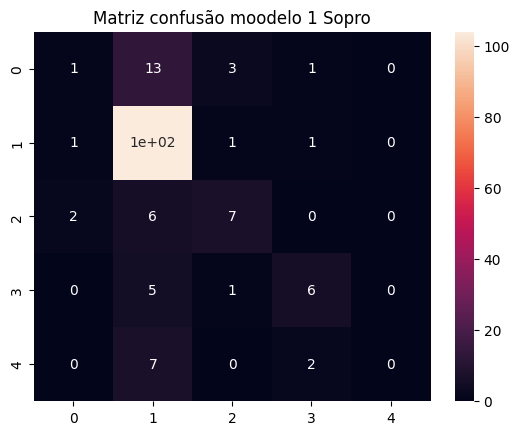

In [35]:
ac.matriz_confusion(results_1_sopro['y_validate'], results_1_sopro['predictions'], title='Matriz confusão moodelo 1 Sopro')

## Model 2

- Detected outilers

In [36]:
outlier_model_2_sopro = ac.detected_outilers_knn(metric="manhattan", algorithm="auto", neighbors=7, dataframe=df_inst_sopro)

- Removed outilers

In [37]:
df_inst_sopro_02 = ac.show_outilers(dataframe=df_inst_sopro, pred=outlier_model_2_sopro["predictions"])
df_inst_sopro_02.head()

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
1876,-0.044667,0.260524,0.692127,0.238955,0.029413,0.424056,0.732275,0.106237,0.264656,-178.568253,...,2269.854161,1872.058375,0.862944,2738.513835,-70.011116,-80.000000,0.139929,30932,clarinet,0
1878,0.089747,0.253008,0.299878,0.225017,0.544357,0.164941,0.079692,0.119684,0.194826,-211.757339,...,2431.808142,1999.856294,1.274141,3282.789275,-58.643265,-71.021973,0.176906,39102,clarinet,0
1886,0.002779,0.015584,0.311722,0.319367,0.339069,0.368589,0.345589,0.443560,0.344975,-85.485229,...,2937.446277,3154.871456,1.945904,5838.245903,-44.260166,-62.325306,0.232276,51374,clarinet,0
1897,0.040330,0.013987,0.226904,0.302980,0.674932,0.560282,0.423103,0.323710,0.402272,-124.647331,...,2093.215040,1949.869060,1.131823,3117.917883,-63.385639,-78.626289,0.151718,33537,clarinet,0
1910,0.088569,0.041482,0.270647,0.269142,0.381336,0.308104,0.464147,0.301898,0.366559,-257.365814,...,3561.932220,1895.280932,1.102197,4491.196663,-20.503735,-58.530994,0.029733,6588,clarinet,0


- Train model

In [38]:
model = RandomForestClassifier(
    bootstrap = False,
    criterion = "entropy",
    max_depth  = 20,
    max_features = "auto",
    min_samples_leaf = 4,
    min_samples_split = 2,
    n_estimators = 202,
    random_state=42
)

X = df_inst_sopro_02.drop(columns=["instrumento", "labels"])
y = df_inst_sopro_02["labels"]

results_2_sopro = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_2_sopro

Size data inputs 161


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=202, random_state=42) do Fold 0: 0.696969696969697


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=202, random_state=42) do Fold 1: 0.71875


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=202, random_state=42) do Fold 2: 0.75


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=202, random_state=42) do Fold 3: 0.75


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=202, random_state=42) do Fold 4: 0.75


{'accuracy': 73.31439393939394,
 'std': 0.021763003670035173,
 'predictions': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1.,
        1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 1., 2., 3., 1., 1., 1., 1., 1., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 2., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 1., 1., 3., 1., 3.]),
 'y_validate': array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 3., 3., 3., 4., 4., 0.,
        0., 0., 0., 1., 1., 1.,

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão moodelo 2 Sopro'}>

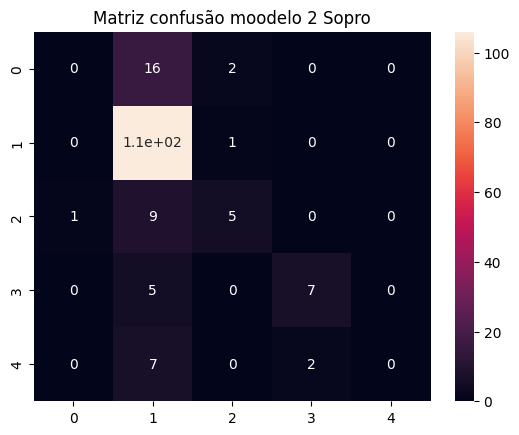

In [39]:
ac.matriz_confusion(results_2_sopro['y_validate'], results_2_sopro['predictions'], title='Matriz confusão moodelo 2 Sopro')

# Percusão 

## Model 1

- Detected outilers

In [40]:
outlier_model_1_percusao = ac.detected_outilers_knn(metric="manhattan", algorithm="brute", neighbors=11, dataframe=df_inst_percusao)

/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/pyod/models/knn.py:158: FutureWarning: algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.
  warn('algorithm parameter is deprecated and will be removed '


- Removed outilers

In [41]:
df_inst_percusao_01 = ac.show_outilers(dataframe=df_inst_percusao, pred=outlier_model_1_percusao["predictions"])
df_inst_percusao_01.head()

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
2066,0.067263,-0.079658,0.400289,0.414243,0.519233,0.403937,0.590723,0.326989,0.475230,-97.677353,...,3505.349304,3813.025950,1.273033,7134.060110,-47.323631,-62.697948,0.257473,56977,cymbals,0
2080,-0.028268,0.020594,0.308341,0.539134,0.486185,0.370537,0.365475,0.277279,0.237507,-201.765625,...,3470.966019,5631.779972,1.150056,8727.017531,-66.101967,-79.368797,0.486816,107670,cymbals,0
2087,0.000423,0.008728,0.315313,0.329236,0.318093,0.291647,0.358462,0.355331,0.340839,-375.171051,...,3459.666432,4034.598255,2.311115,7370.300831,-48.193481,-79.993744,0.275738,60975,cymbals,0
2090,-0.027502,-0.040906,0.428343,0.575150,0.432707,0.349952,0.269307,0.282274,0.353393,-208.308487,...,3599.667922,4320.618296,1.748420,7560.852192,-42.228710,-69.745705,0.315267,69716,cymbals,0
2094,0.001026,0.038686,0.623367,0.699129,0.707563,0.655757,0.604192,0.523323,0.529614,-188.658508,...,3826.681620,3867.138696,1.992037,7526.653869,-51.500580,-59.241554,0.211064,46633,cymbals,0


- Train model

In [42]:
model = XGBClassifier(
    eta=0.2,
    gamma=0,
    learning_rate=0.2868063771314829,
    max_depth=6,
    subsample=0.8479144073598172,
)

X = df_inst_percusao_01.drop(columns=["instrumento", "labels"])
y = df_inst_percusao_01["labels"]

results_1_percusao = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_1_percusao

Size data inputs 156
Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2868063771314829, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.8125
Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_b

{'accuracy': 78.83064516129032,
 'std': 0.033688062216460375,
 'predictions': array([0., 2., 0., 0., 0., 0., 2., 0., 0., 2., 2., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0.,
        0., 0., 0., 0., 0., 2., 0., 1., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
        2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
        0., 1., 0., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0., 0., 2., 0., 0., 2., 2.,
        1., 0., 1., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0.,
        0., 1., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 1., 2., 2.,
        2., 2., 2.]),
 'y_validate': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,

- Matrix de confusão

<Axes: title={'center': 'Matriz confusão moodelo 1 Percusão'}>

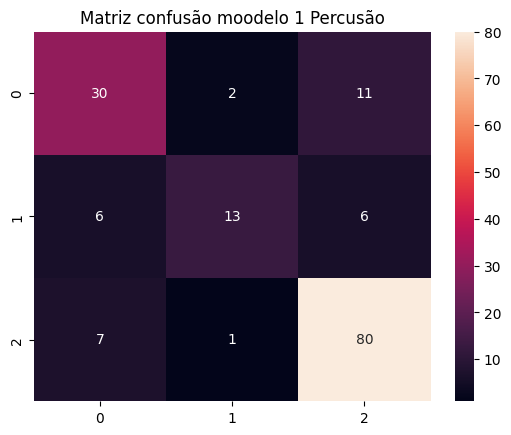

In [43]:
ac.matriz_confusion(results_1_percusao['y_validate'], results_1_percusao['predictions'], title='Matriz confusão moodelo 1 Percusão')

## Model 2

- Detected Outilers 

In [44]:
outlier_model_2_percusao = ac.detected_outilers_knn(metric="manhattan", algorithm="ball_tree", neighbors=11, dataframe=df_inst_percusao)

- Removed outilers

In [45]:
df_inst_percusao_02 = ac.show_outilers(dataframe=df_inst_percusao, pred=outlier_model_2_percusao["predictions"])
df_inst_percusao_02.head()

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
2066,0.067263,-0.079658,0.400289,0.414243,0.519233,0.403937,0.590723,0.326989,0.475230,-97.677353,...,3505.349304,3813.025950,1.273033,7134.060110,-47.323631,-62.697948,0.257473,56977,cymbals,0
2080,-0.028268,0.020594,0.308341,0.539134,0.486185,0.370537,0.365475,0.277279,0.237507,-201.765625,...,3470.966019,5631.779972,1.150056,8727.017531,-66.101967,-79.368797,0.486816,107670,cymbals,0
2087,0.000423,0.008728,0.315313,0.329236,0.318093,0.291647,0.358462,0.355331,0.340839,-375.171051,...,3459.666432,4034.598255,2.311115,7370.300831,-48.193481,-79.993744,0.275738,60975,cymbals,0
2090,-0.027502,-0.040906,0.428343,0.575150,0.432707,0.349952,0.269307,0.282274,0.353393,-208.308487,...,3599.667922,4320.618296,1.748420,7560.852192,-42.228710,-69.745705,0.315267,69716,cymbals,0
2094,0.001026,0.038686,0.623367,0.699129,0.707563,0.655757,0.604192,0.523323,0.529614,-188.658508,...,3826.681620,3867.138696,1.992037,7526.653869,-51.500580,-59.241554,0.211064,46633,cymbals,0


- Train Model

In [46]:
model = XGBClassifier(
    eta=0.1940450475269715,
    gamma=0,
    learning_rate= 0.01990959791578459,
    max_depth=7,
    subsample=0.6581612388921976,
)

X = df_inst_percusao_02.drop(columns=["instrumento", "labels"])
y = df_inst_percusao_02["labels"]

results_2_percusao = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_2_percusao

Size data inputs 156
Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1940450475269715,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01990959791578459,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.84375
Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
        

{'accuracy': 78.16532258064515,
 'std': 0.06351158464386658,
 'predictions': array([0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 2., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
        0., 0., 0., 0., 0., 2., 0., 1., 2., 0., 2., 2., 0., 2., 0., 2., 2.,
        2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0., 0., 2., 0., 0., 2., 2.,
        1., 0., 1., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 2., 0., 0., 1., 0., 2.,
        0., 1., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 1., 2., 2.,
        2., 2., 2.]),
 'y_validate': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão moodelo 2 Percusão'}>

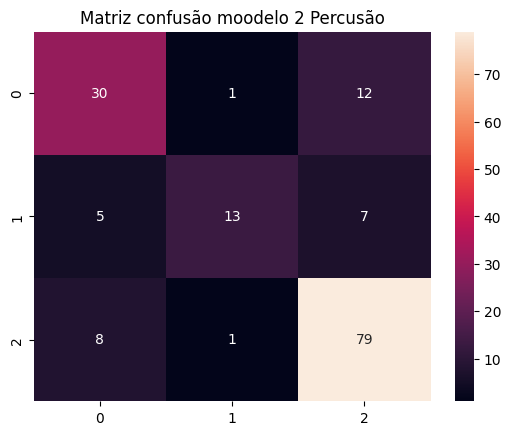

In [47]:
ac.matriz_confusion(results_2_percusao['y_validate'], results_2_percusao['predictions'], title='Matriz confusão moodelo 2 Percusão')

# Corda

## Model 1

- Detected outilers

In [48]:
outlier_model_1_corda = ac.detected_outilers_knn(metric="manhattan", algorithm="auto", neighbors=7, dataframe=df_inst_corda)

- Removed Outilers

In [49]:
df_inst_corda_01 = ac.show_outilers(dataframe=df_inst_corda, pred=outlier_model_1_corda["predictions"])
df_inst_corda_01

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
546,-0.019221,0.017872,0.412917,0.454047,0.530891,0.557669,0.349409,0.344261,0.382070,-202.772339,...,3570.616525,3004.965818,1.600475,5830.002334,-78.944046,-80.000000,0.175861,38878,banjo,0
548,0.104703,-0.251793,0.163021,0.812954,0.344378,0.115020,0.292584,0.153532,0.169621,-140.371948,...,2368.569054,1704.019101,1.065461,2712.683983,-69.137093,-79.591011,0.129967,28745,banjo,0
555,-0.035994,0.023556,0.502060,0.572897,0.544631,0.463271,0.181727,0.342575,0.116119,-176.971466,...,2538.017416,2065.352164,1.527929,3548.731828,-65.745941,-79.547966,0.154887,34292,banjo,0
568,0.043110,0.066330,0.440219,0.389270,0.395524,0.258050,0.457849,0.691774,0.416733,-122.602631,...,3411.582273,3092.499189,1.893822,6134.714644,-52.462601,-61.374920,0.155652,34392,banjo,0
570,0.128059,0.082795,0.264848,0.264230,0.504677,0.353699,0.363608,0.434325,0.461813,-43.627769,...,3736.268165,3178.869223,1.445494,6845.210425,-47.192692,-59.145737,0.158472,35001,banjo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,0.245498,0.118295,0.543562,0.182454,0.216361,0.102068,0.101784,0.057516,0.224278,-176.401840,...,3077.597011,2164.876744,1.104201,3932.632368,-16.998505,-46.478806,0.154087,34053,violin,6
7999,0.188614,-0.123051,0.435805,0.078954,0.048469,0.095815,0.166382,0.088318,0.250419,-390.158630,...,2069.443752,1772.864514,1.268380,2945.977004,-76.595161,-80.000000,0.126178,27872,violin,6
8017,0.096697,-0.279816,0.159033,0.078111,0.079078,0.180735,0.292732,0.125269,0.363708,-115.140617,...,3348.078759,2277.244488,1.186836,3779.127109,-50.537724,-80.000000,0.143759,31806,violin,6
8020,0.015595,-0.058762,0.120028,0.238263,0.234643,0.267743,0.228591,0.260930,0.267262,-324.705627,...,3383.563150,3573.542978,1.354204,6552.813508,-43.596504,-73.498703,0.230540,50962,violin,6


- Train Model

In [50]:
results_corda.nlargest(5, 'accuracy_models')

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
38,minkowski,auto,9,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.740741,corda,Random Forest
13,manhattan,auto,5,"{'eta': 0.027861238825289514, 'gamma': 1, 'lea...",54.740741,corda,XGBoost
42,euclidean,kd_tree,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",54.383838,corda,Random Forest
24,euclidean,auto,7,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.370370,corda,Random Forest
51,euclidean,ball_tree,11,"{'bootstrap': False, 'criterion': 'entropy', '...",54.020202,corda,Random Forest


In [51]:
model = RandomForestClassifier(
    bootstrap = False,
    criterion = "entropy",
    max_depth  = 20,
    max_features = "auto",
    min_samples_leaf = 2,
    min_samples_split = 2,
    n_estimators = 500,
    random_state=42
)

X = df_inst_corda_01.drop(columns=["instrumento", "labels"])
y = df_inst_corda_01["labels"]

results_1_corda = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_1_corda

Size data inputs 274


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=2,
                       n_estimators=500, random_state=42) do Fold 0: 0.4727272727272727


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=2,
                       n_estimators=500, random_state=42) do Fold 1: 0.509090909090909


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=2,
                       n_estimators=500, random_state=42) do Fold 2: 0.43636363636363634


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=2,
                       n_estimators=500, random_state=42) do Fold 3: 0.6


/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acuracia do modelo RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='auto', min_samples_leaf=2,
                       n_estimators=500, random_state=42) do Fold 4: 0.46296296296296297


{'accuracy': 49.62289562289562,
 'std': 0.05687999879521526,
 'predictions': array([5., 3., 3., 6., 0., 0., 4., 0., 1., 0., 1., 1., 0., 6., 1., 1., 1.,
        6., 3., 3., 6., 3., 3., 3., 3., 3., 4., 0., 6., 6., 6., 1., 5., 4.,
        3., 3., 3., 3., 6., 6., 6., 1., 6., 6., 4., 6., 3., 6., 6., 6., 3.,
        3., 3., 3., 3., 0., 5., 6., 1., 5., 6., 6., 1., 5., 0., 1., 6., 0.,
        1., 1., 5., 1., 3., 6., 5., 3., 3., 3., 3., 1., 3., 6., 5., 6., 0.,
        6., 1., 6., 5., 1., 5., 5., 0., 6., 6., 6., 6., 6., 6., 3., 6., 6.,
        6., 6., 1., 6., 6., 6., 6., 6., 6., 0., 1., 0., 3., 6., 6., 1., 1.,
        5., 1., 1., 1., 1., 3., 5., 1., 1., 6., 6., 6., 3., 1., 6., 6., 6.,
        5., 6., 1., 5., 6., 6., 1., 6., 3., 5., 5., 1., 6., 4., 6., 3., 6.,
        6., 6., 6., 6., 6., 6., 6., 0., 6., 1., 6., 1., 0., 0., 1., 0., 1.,
        6., 0., 1., 1., 1., 1., 1., 1., 1., 3., 5., 1., 6., 6., 3., 1., 6.,
        3., 3., 3., 3., 6., 1., 6., 6., 1., 1., 1., 6., 0., 6., 1., 6., 6.,
        4., 

- Matriz de Confusão

<Axes: title={'center': 'Matriz confusão moodelo 1 corda'}>

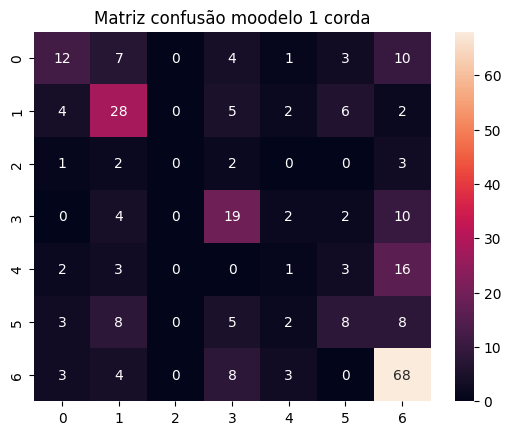

In [52]:
ac.matriz_confusion(results_1_corda['y_validate'], results_1_corda['predictions'], title='Matriz confusão moodelo 1 corda')

# Model 2

- Detected Outilers

In [53]:
outlier_model_2_corda = ac.detected_outilers_knn(metric="manhattan", algorithm="auto", neighbors=5, dataframe=df_inst_corda)

- Removed Outilers 

In [54]:
df_inst_corda_02 = ac.show_outilers(dataframe=df_inst_corda, pred=outlier_model_2_corda["predictions"])
df_inst_corda_02

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,labels
524,0.044009,0.049910,0.422762,0.372759,0.418751,0.342388,0.345684,0.425205,0.419690,-113.403656,...,3451.164410,2589.236162,1.418300,5736.500270,-55.941154,-70.428162,0.124409,27503,banjo,0
546,-0.019221,0.017872,0.412917,0.454047,0.530891,0.557669,0.349409,0.344261,0.382070,-202.772339,...,3570.616525,3004.965818,1.600475,5830.002334,-78.944046,-80.000000,0.175861,38878,banjo,0
548,0.104703,-0.251793,0.163021,0.812954,0.344378,0.115020,0.292584,0.153532,0.169621,-140.371948,...,2368.569054,1704.019101,1.065461,2712.683983,-69.137093,-79.591011,0.129967,28745,banjo,0
555,-0.035994,0.023556,0.502060,0.572897,0.544631,0.463271,0.181727,0.342575,0.116119,-176.971466,...,2538.017416,2065.352164,1.527929,3548.731828,-65.745941,-79.547966,0.154887,34292,banjo,0
570,0.128059,0.082795,0.264848,0.264230,0.504677,0.353699,0.363608,0.434325,0.461813,-43.627769,...,3736.268165,3178.869223,1.445494,6845.210425,-47.192692,-59.145737,0.158472,35001,banjo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,0.245498,0.118295,0.543562,0.182454,0.216361,0.102068,0.101784,0.057516,0.224278,-176.401840,...,3077.597011,2164.876744,1.104201,3932.632368,-16.998505,-46.478806,0.154087,34053,violin,6
7999,0.188614,-0.123051,0.435805,0.078954,0.048469,0.095815,0.166382,0.088318,0.250419,-390.158630,...,2069.443752,1772.864514,1.268380,2945.977004,-76.595161,-80.000000,0.126178,27872,violin,6
8017,0.096697,-0.279816,0.159033,0.078111,0.079078,0.180735,0.292732,0.125269,0.363708,-115.140617,...,3348.078759,2277.244488,1.186836,3779.127109,-50.537724,-80.000000,0.143759,31806,violin,6
8020,0.015595,-0.058762,0.120028,0.238263,0.234643,0.267743,0.228591,0.260930,0.267262,-324.705627,...,3383.563150,3573.542978,1.354204,6552.813508,-43.596504,-73.498703,0.230540,50962,violin,6


- Train Model

In [55]:
model = XGBClassifier(
    eta=0.027861238825289514,
    gamma=1,
    learning_rate= 0.24788897091932685,
    max_depth=10,
    subsample= 0.7310616202676429,
)

X = df_inst_corda_02.drop(columns=["instrumento", "labels"])
y = df_inst_corda_02["labels"]

results_2_corda = tm.cross_validate_balancead(k=5, model=model, X=X, y=y)
results_2_corda

Size data inputs 274
Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.027861238825289514,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.24788897091932685,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.509090909090909
Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=N

{'accuracy': 54.74074074074073,
 'std': 0.07848004555530878,
 'predictions': array([4., 5., 6., 6., 0., 0., 6., 1., 1., 1., 0., 5., 1., 1., 3., 1., 0.,
        1., 3., 3., 3., 4., 6., 6., 3., 3., 4., 0., 1., 5., 6., 1., 5., 4.,
        5., 5., 5., 3., 6., 6., 6., 1., 6., 6., 6., 6., 6., 6., 6., 6., 3.,
        5., 3., 3., 3., 3., 6., 3., 0., 1., 6., 6., 1., 1., 1., 1., 1., 5.,
        1., 3., 1., 1., 1., 6., 3., 5., 2., 3., 3., 3., 6., 6., 5., 6., 0.,
        6., 5., 6., 1., 5., 1., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 4.,
        6., 6., 6., 6., 1., 6., 6., 6., 1., 6., 0., 1., 4., 3., 4., 0., 1.,
        3., 1., 5., 1., 3., 5., 2., 2., 5., 6., 3., 4., 3., 3., 3., 3., 6.,
        5., 6., 1., 5., 0., 0., 6., 1., 6., 3., 5., 5., 6., 4., 6., 6., 6.,
        6., 6., 5., 6., 6., 6., 6., 4., 6., 1., 6., 1., 0., 0., 0., 0., 0.,
        6., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 3., 3., 6., 3.,
        3., 3., 6., 6., 3., 1., 6., 6., 5., 1., 1., 1., 5., 6., 5., 4., 4.,
        6., 

- Matrix de confusão

<Axes: title={'center': 'Matriz confusão moodelo 2 corda'}>

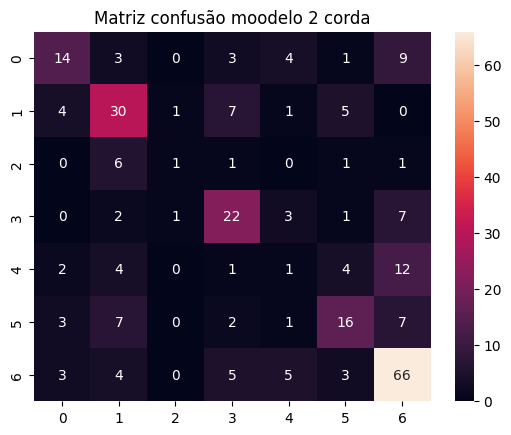

In [56]:
ac.matriz_confusion(results_2_corda['y_validate'], results_2_corda['predictions'], title='Matriz confusão moodelo 2 corda')

# Resultados finais

- Atualizando os resultados

In [57]:
acuracia_cros_val = results_aerofone_1["accuracy"], results_2_aerofone["accuracy"], results_2_corda["accuracy"], results_1_corda["accuracy"], results_1_percusao["accuracy"], results_2_percusao["accuracy"], results_1_sopro["accuracy"], results_2_sopro["accuracy"]
std_cros_val = results_aerofone_1["std"], results_2_aerofone["std"], results_1_corda["std"], results_2_corda["std"], results_1_percusao["std"], results_2_percusao["std"], results_1_sopro["std"], results_2_sopro["std"]

results_geral

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
0,minkowski,kd_tree,11,"{'loss': 'log_loss', 'max_bins': 105, 'max_dep...",76.000000,aerofone,HistGradientBoost,Model-01
1,minkowski,auto,11,"{'loss': 'auto', 'max_bins': 132, 'max_depth':...",74.857143,aerofone,HistGradientBoost,Model-02
2,minkowski,auto,9,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.740741,corda,Random Forest,Model-01
3,manhattan,auto,5,"{'eta': 0.027861238825289514, 'gamma': 1, 'lea...",54.740741,corda,XGBoost,Model-02
4,manhattan,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.28...",78.830645,percusao,XGBoost,Model-01
5,manhattan,ball_tree,11,"{'eta': 0.1940450475269715, 'gamma': 0, 'learn...",78.165323,percusao,XGBoost,Model-02
6,manhattan,brute,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",75.795455,sopro,Random Forest,Model-01
7,manhattan,auto,7,"{'bootstrap': False, 'criterion': 'entropy', '...",74.564394,sopro,Random Forest,Model-02


- Ordenar modelos por ordem decrescente

In [58]:
results_geral[["base", "accuracy_models", "model"]]

,base,accuracy_models,model
0,aerofone,76.000000,HistGradientBoost
1,aerofone,74.857143,HistGradientBoost
2,corda,54.740741,Random Forest
3,corda,54.740741,XGBoost
4,percusao,78.830645,XGBoost
5,percusao,78.165323,XGBoost
6,sopro,75.795455,Random Forest
7,sopro,74.564394,Random Forest


In [59]:
results_geral["accuracy_models"] = acuracia_cros_val
results_geral["std_accuracy_model"] = std_cros_val
results_geral["model"] = ["HistGradientBoost", "HistGradientBoost", "XGBoost", "Random Forest", "XGBoost", "XGBoost", "Random Forest", "Random Forest"]

results_geral

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test,std_accuracy_model
0,minkowski,kd_tree,11,"{'loss': 'log_loss', 'max_bins': 105, 'max_dep...",76.000000,aerofone,HistGradientBoost,Model-01,0.042762
1,minkowski,auto,11,"{'loss': 'auto', 'max_bins': 132, 'max_depth':...",74.857143,aerofone,HistGradientBoost,Model-02,0.041991
2,minkowski,auto,9,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.740741,corda,XGBoost,Model-01,0.056880
3,manhattan,auto,5,"{'eta': 0.027861238825289514, 'gamma': 1, 'lea...",49.622896,corda,Random Forest,Model-02,0.078480
4,manhattan,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.28...",78.830645,percusao,XGBoost,Model-01,0.033688
5,manhattan,ball_tree,11,"{'eta': 0.1940450475269715, 'gamma': 0, 'learn...",78.165323,percusao,XGBoost,Model-02,0.063512
6,manhattan,brute,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.314394,sopro,Random Forest,Model-01,0.021763
7,manhattan,auto,7,"{'bootstrap': False, 'criterion': 'entropy', '...",73.314394,sopro,Random Forest,Model-02,0.021763
